# Nama : Nuraisah
# Nim : 2106080
# Mata Kuliah : Pengolahan Citra Digital
❤❤❤❤❤❤❤❤❤❤❤❤ ❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤
# FRUITS AND VEGETABLES RECOGNITION
# MODEL YANG TELAH DI UJI COBA DARI JURNAL REFERENSI UNTUK UAS



In [30]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

1. Dari jurnal yang akan saya pakai untuk referensi UAS, penulis mendapatkan dataset dari kaggle. Karna dataset nya memiliki folder yang banyak jadi untuk memakai dataset saya menggunakan cara dengan mengupload file zip nya ke Google Drive. kemudian dari google drive di import ke colab.

In [13]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


2. Nah disini setelah colab dengan drive nya sinkron, saya melakukan pemanggilan unzip file untuk mengekstrak dataset kemudian untuk menyimpan path atau direktori nya saya tempatkan di content folder train, validation dan test.

In [14]:
# Replace 'your_zip_file.zip' with the actual name of your zip file
train_zip_file_path = "/content/drive/MyDrive/coding/train.zip"

# Specify the directory where you want to unzip the files
extracted_folder_path = '/content/train'

# Create the directory if it doesn't exist
!mkdir -p $extracted_folder_path

# Unzip the file
!unzip -q $train_zip_file_path -d $extracted_folder_path


In [15]:
# Replace 'your_zip_file.zip' with the actual name of your zip file
validation_zip_file_path = "/content/drive/MyDrive/coding/validation.zip"

# Specify the directory where you want to unzip the files
extracted_folder_path = '/content/validation'

# Create the directory if it doesn't exist
!mkdir -p $extracted_folder_path

# Unzip the file
!unzip -q $validation_zip_file_path -d $extracted_folder_path


3. Folder train Ditemukan 3115 file milik 36 kelas.

In [17]:
import tensorflow as tf

# Ubah path ke dataset yang telah diekstrak
path_dataset = '/content/train'

# Buat dataset
training_set = tf.keras.utils.image_dataset_from_directory(
    path_dataset,
    labels='inferred',
    label_mode='categorical',
    class_names=None,
    color_mode='rgb',
    batch_size=32,
    image_size=(224, 224),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)


Found 3115 files belonging to 36 classes.


4. Folder validation Ditemukan 351 file milik 36 kelas.

In [19]:
import tensorflow as tf

# Ubah path ke dataset validasi yang telah diekstrak
path_dataset_validation = '/content/validation'

# Buat dataset validasi
validation_set = tf.keras.utils.image_dataset_from_directory(
    path_dataset_validation,
    labels='inferred',
    label_mode='categorical',
    class_names=None,
    color_mode='rgb',
    batch_size=32,
    image_size=(224, 224),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)


Found 351 files belonging to 36 classes.


5. Model yang dipakai Convolutional Neural Network (CNN) untuk klasifikasi gambar dan deteksi objek.

In [20]:
from tensorflow.keras.layers import BatchNormalization
cnn= tf.keras.models.Sequential()
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=[224,224,3]))
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))
cnn.add(BatchNormalization())
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))
#########################
cnn.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, activation='relu'))
cnn.add(BatchNormalization())
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))
#######################
cnn.add(tf.keras.layers.Conv2D(filters=128, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=128, kernel_size=3, activation='relu'))
cnn.add(BatchNormalization())
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))
##########################
cnn.add(tf.keras.layers.Conv2D(filters=256, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=256, kernel_size=3, activation='relu'))
cnn.add(BatchNormalization())
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))
######################
cnn.add(tf.keras.layers.Flatten())
cnn.add(tf.keras.layers.Dense(units=512, activation='relu'))
cnn.add(tf.keras.layers.Dense(units=512, activation='relu'))
cnn.add(BatchNormalization())
cnn.add(tf.keras.layers.Dropout(0.5))
cnn.add(tf.keras.layers.Dense(units=36, activation='softmax'))

In [21]:
cnn.compile(optimizer="adam", loss='categorical_crossentropy', metrics=['accuracy'])
cnn.summary()

# from keras.optimizers import Adam
# ADAM = Adam(learning_rate=0.001)
# cnn.compile(loss='categorical_crossentropy', optimizer=ADAM, metrics=['accuracy'])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 32)      9248      
                                                                 
 batch_normalization (Batch  (None, 220, 220, 32)      128       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 110, 110, 32)      0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 64)      18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 64)      3

6. Proses training sampai di epoch 20 dengan accuracy train = 0.9602 validasi = 0.9088

In [22]:
training_history= cnn.fit(x=training_set, validation_data=validation_set, epochs=20)

Epoch 1/20
98/98 [==============================] - 1412s 14s/step - loss: 4.1697 - accuracy: 0.0642 - val_loss: 4.7744 - val_accuracy: 0.0513
Epoch 2/20
98/98 [==============================] - 1414s 14s/step - loss: 3.5007 - accuracy: 0.1291 - val_loss: 4.3437 - val_accuracy: 0.1168
Epoch 3/20
98/98 [==============================] - 1413s 14s/step - loss: 2.9922 - accuracy: 0.2010 - val_loss: 3.7534 - val_accuracy: 0.1795
Epoch 4/20
98/98 [==============================] - 1412s 14s/step - loss: 2.8462 - accuracy: 0.2228 - val_loss: 4.2524 - val_accuracy: 0.1425
Epoch 5/20
98/98 [==============================] - 1416s 14s/step - loss: 2.6538 - accuracy: 0.2677 - val_loss: 2.4415 - val_accuracy: 0.3219
Epoch 6/20
98/98 [==============================] - 1440s 15s/step - loss: 2.4067 - accuracy: 0.3059 - val_loss: 2.2306 - val_accuracy: 0.3134
Epoch 7/20
98/98 [==============================] - 1421s 14s/step - loss: 2.2399 - accuracy: 0.3509 - val_loss: 1.7081 - val_accuracy: 0.5185

Data Preprocessing

Training Image Preprocessing and
Validation Image Preprocessing
: model training purpose

:test set is evaluation purpose



Building Convolution Layer
batchnormalization

Compiling Training Phase

Saving Model

In [23]:
cnn.save('VStrained_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [24]:
#Recording History
import json
with open('training_hist.json','w') as f:
  json.dump(training_history.history,f)

Calculating Accuracy of Model Achieved on Validation Set

In [25]:
print("Validation Set Accuracy: {} %" .format(training_history.history['val_accuracy'][-1]*100))

print("Training Set Accuracy: {} %" .format(training_history.history['accuracy'][-1]*100))

Validation Set Accuracy: 90.88318943977356 %
Training Set Accuracy: 96.0192620754242 %


Visualization

Training

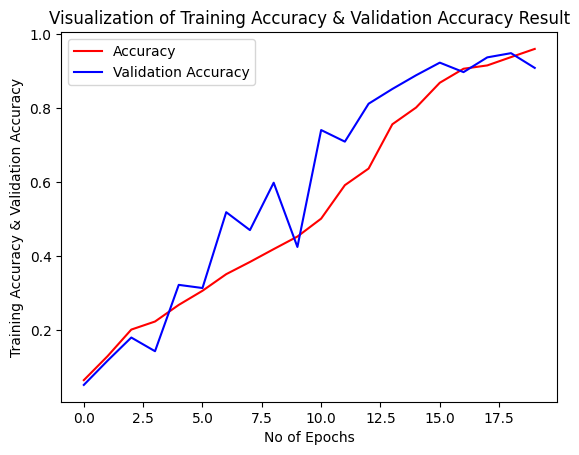

In [31]:
epochs=[i for i in range (1,40)]
plt.plot(training_history.history['accuracy'],color='red',label='Accuracy')
plt.plot(training_history.history['val_accuracy'],color='blue',label='Validation Accuracy')
plt.xlabel('No of Epochs')
plt.ylabel('Training Accuracy & Validation Accuracy')
plt.title('Visualization of Training Accuracy & Validation Accuracy Result')
plt.legend()
plt.show()

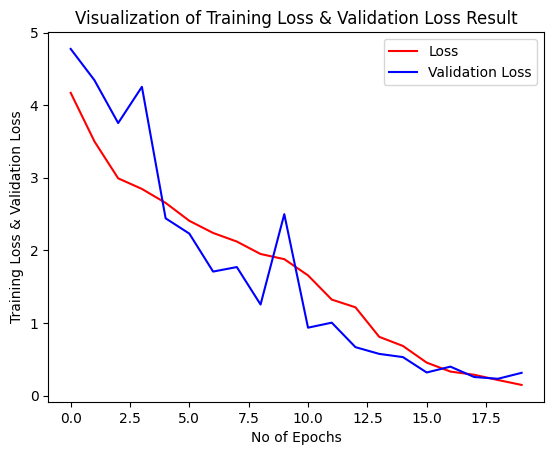

In [32]:
plt.plot(training_history.history['loss'],color='red',label='Loss')
plt.plot(training_history.history['val_loss'],color='blue',label='Validation Loss')
plt.xlabel('No of Epochs')
plt.ylabel('Training Loss & Validation Loss')
plt.title('Visualization of Training Loss & Validation Loss Result')
plt.legend()
plt.show()

Evaluation

In [33]:
loss,accuracy=cnn.evaluate(training_set)

98/98 [==============================] - 437s 4s/step - loss: 0.3002 - accuracy: 0.9136


In [34]:
val_loss,val_accuracy=cnn.evaluate(validation_set)

11/11 [==============================] - 53s 4s/step - loss: 0.3135 - accuracy: 0.9088


7. Proses ekstraksi zip test

In [38]:
# Replace 'your_zip_file.zip' with the actual name of your zip file
test_zip_file_path = "/content/drive/MyDrive/coding/test.zip"

# Specify the directory where you want to unzip the files
extracted_folder_path = '/content/test'

# Create the directory if it doesn't exist
!mkdir -p $extracted_folder_path

# Unzip the file
!unzip -q $test_zip_file_path -d $extracted_folder_path


In [39]:
import tensorflow as tf

# Ubah path ke dataset pengujian yang telah diekstrak
path_dataset_test = '/content/test'

# Buat dataset pengujian
test_set = tf.keras.utils.image_dataset_from_directory(
    path_dataset_test,
    labels='inferred',
    label_mode='categorical',
    class_names=None,
    color_mode='rgb',
    batch_size=32,
    image_size=(224, 224),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)


Found 359 files belonging to 36 classes.


8. accuracy test di 12 dengan nilai = 0.9081

In [40]:
test_loss,test_accuracy=cnn.evaluate(test_set)

12/12 [==============================] - 60s 4s/step - loss: 0.3117 - accuracy: 0.9081


9. Hasil test menunjukan akurat

In [41]:
test_accuracy*100

90.80780148506165

10. Hasil dari percobaan model ini dengan CNN akurat terhadap klasifikasi gambar dan deteksi objek buah dan sayur.

1/1 [==============================] - 4s 4s/step


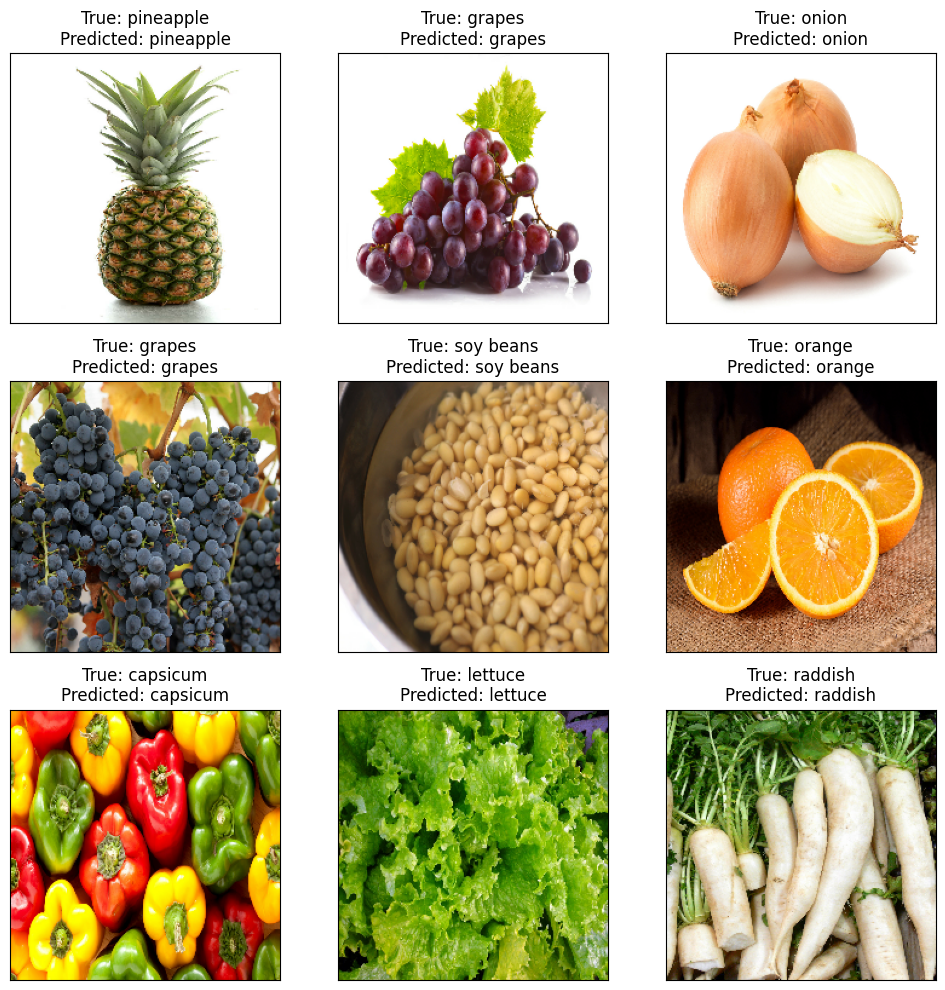

In [42]:
import matplotlib.pyplot as plt

# Assuming you have your CNN model (cnn) and test dataset (test_set)
# The 'pred' variable is already defined with the predicted labels

# Retrieve a few test samples and their corresponding true labels
num_samples_to_display = 9
sample_images, sample_labels = next(iter(test_set.take(num_samples_to_display)))

# Get the corresponding class names from the test_set
class_names = test_set.class_names

# Make predictions on the sampled images
sample_predictions = cnn.predict(sample_images)
sample_predictions = np.argmax(sample_predictions, axis=1)

# Display the images with their true and predicted labels
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(10, 10),
                         subplot_kw={'xticks': [], 'yticks': []})

for i, ax in enumerate(axes.flat):
    ax.imshow(sample_images[i].numpy().astype(np.uint8))
    true_label = class_names[np.argmax(sample_labels[i])]
    predicted_label = class_names[sample_predictions[i]]
    ax.set_title(f"True: {true_label}\nPredicted: {predicted_label}")

plt.tight_layout()
plt.show()

